In [1]:
import pandas as pd;import numpy as np; import matplotlib.pyplot as plt; 

from matplotlib.colors import LogNorm,Normalize
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,AutoMinorLocator)

In [2]:
def plot(df):
    df.columns = ['id', 'ztrue', 'zphot', 'zphoterr', 'N_cm']
    df = df.iloc[:, :-1]
    df = df.sort_values(by=['ztrue'])  
    plt.plot(df.ztrue,df.zphot,'o',c='r',alpha=0.5)

In [3]:
df = pd.read_csv('tt0_2.zphot',sep=' ',index_col=False)#,header=None)
df_w=pd.read_csv('tt0_14.zphot',sep=' ',index_col=False)

df.columns   = ['id', 'ztrue', 'zphot', 'zphoterr', 'N_cm']
df_w.columns = ['id', 'ztrue', 'zphot', 'zphoterr', 'N_cm']

df = df.iloc[:, :-1]
df_w = df_w.iloc[:, :-1]

df   = df.sort_values(by=['ztrue'])   
df_w = df_w.sort_values(by=['ztrue'])   

(array([ 3678., 16597., 23972., 28996., 24442., 20135., 12741., 11211.,
        10584.,  6216.,  4160.,  3390.,  2179.,  1938.,  1530.,  1512.,
         1336.,  1193.,  1116.,  1356.]),
 array([0.0202  , 0.194135, 0.36807 , 0.542005, 0.71594 , 0.889875,
        1.06381 , 1.237745, 1.41168 , 1.585615, 1.75955 , 1.933485,
        2.10742 , 2.281355, 2.45529 , 2.629225, 2.80316 , 2.977095,
        3.15103 , 3.324965, 3.4989  ]),
 <a list of 20 Patch objects>)

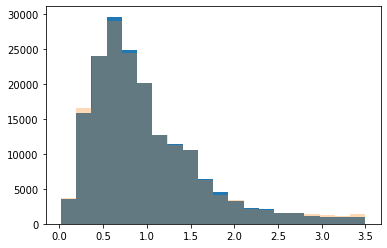

In [4]:
plt.hist(df.ztrue,bins=20)
plt.hist(df.zphot,bins=20,alpha=0.3)

In [5]:
x1=df.zphot #z photo
x2=df_w.zphot# zphoto
y1=df.ztrue  # ztrue
y2=df_w.ztrue# ztrue

### Only interested in WFIRST data. 

In [6]:
columns=['z_true','z_phot']

In [7]:
index=range(0,len(x2)) #x2 = Wfirst

In [8]:
Lsst=pd.concat([y1,x1],axis=1)
Wfir=pd.concat([y2,x2],axis=1)# Wfir

In [9]:
bb = pd.DataFrame(columns=columns,index=index)

In [10]:
bb['z_true']=Wfir['ztrue']
bb['z_phot']=Wfir['zphot']

bb = bb.sort_values('z_true')   
bb.reset_index(inplace = True, drop = True) 

In [11]:
bb

,z_true,z_phot
0,0.0170,0.0461
1,0.0202,0.0494
2,0.0205,0.0224
3,0.0222,0.0875
4,0.0223,0.2089
...,...,...
178457,3.4967,3.4699
178458,3.4969,3.4647
178459,3.4971,0.4368
178460,3.4981,3.3841


In [13]:
bb.to_csv('wfirst_data.csv',sep=' ',index=False)

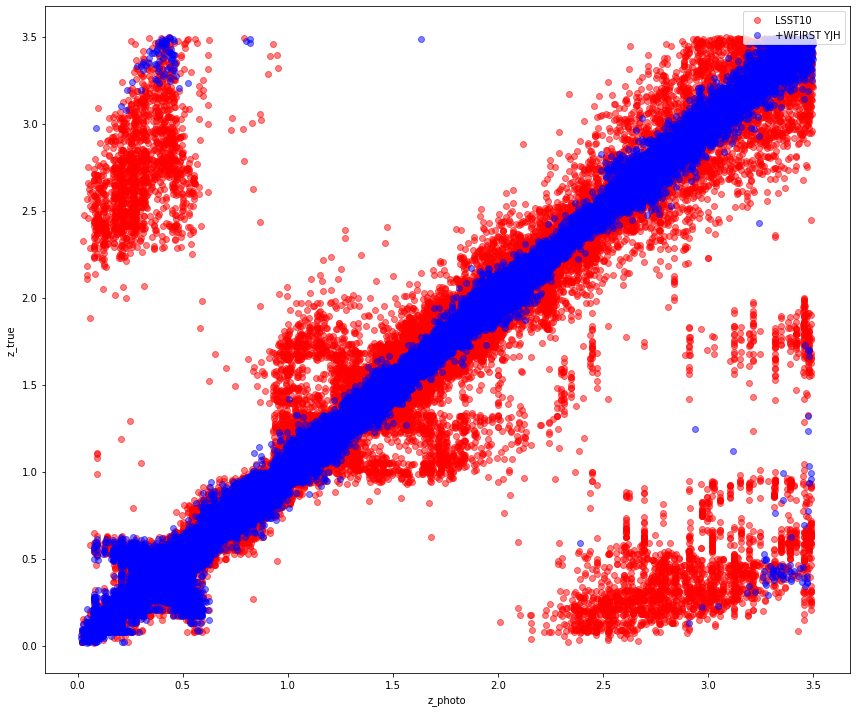

In [12]:
plt.rcParams['figure.figsize'] = [12, 10]
plt.plot(x1,y1,'o',c='r',alpha=0.5,label='LSST10')
plt.plot(x2,y2,'o',c='b',alpha=0.5,label=r'+WFIRST YJH')

plt.xlabel('z_photo')
plt.ylabel('z_true')
plt.tight_layout()
plt.legend(loc="upper right")
#plt.savefig('Wfirst.jpg',bbox_inches='tight')